# Artist Animation

Create a series of pictures and feed them in as the *artist* that will render the animation.  In the case of matplotlib, we need some way to render this into video that can be displayed in a browser.  The cleanest way is by rendering to HTML with some Javascript support.

In [1]:
# %matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation

fig = plt.figure()

cat = plt.imread('cat1.jpeg')
dog = plt.imread('dog1.jpeg')
c=cat[:180, :250, :]
d=dog[:180, :250, :]

# im = plt.imshow(c, animated=True)

def morph(c, d, alpha):
    return (alpha * c + (1-alpha) * d).astype(int)

ims = []
for i in np.linspace(0, 1, 30):
    im = plt.imshow(morph(c, d, i))
    ims.append([im])
ani = ArtistAnimation(fig, ims,  blit=True, interval=100, repeat=True)
# plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())

FileNotFoundError: [Errno 2] No such file or directory: 'cat1.jpeg'

<Figure size 640x480 with 0 Axes>

# Function Animation

Instead of rendering each image separately, we use a function to update the plot.  The parameter `frame` is passed in to each call of the `update` function, so we can use this as a parameter to decide what to compute next.

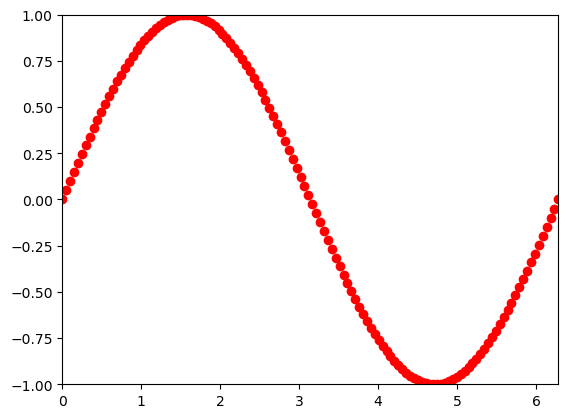

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# %matplotlib notebook

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True, interval=10)
# plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())